In [1]:
import pyart
import matplotlib.pyplot as plt
from matplotlib import ticker, colors
import numpy as np
import os
from JSAnimation import IPython_display
from JSAnimation.IPython_display import display_animation

from matplotlib.animation import FuncAnimation

%matplotlib inline


In [4]:
indir = '/data/right_now//'
all_files = os.listdir(indir)
ppis = []
for fl in all_files:
    if 'sgp' in fl and os.stat(os.path.join(indir, fl)).st_size > 900000:
        ppis.append(os.path.join(indir, fl))
ppis.sort()

In [5]:
print ppis

['/data/right_now//sgpcsaprsurI7.00.20150730.171301.raw.cfrad.20150730_160842.517_CSAP_v18480_SUR.nc', '/data/right_now//sgpcsaprsurI7.00.20150730.171301.raw.cfrad.20150730_161936.320_CSAP_v18485_SUR.nc', '/data/right_now//sgpcsaprsurI7.00.20150730.171301.raw.cfrad.20150730_163030.250_CSAP_v18490_SUR.nc', '/data/right_now//sgpcsaprsurI7.00.20150730.171301.raw.cfrad.20150730_164124.233_CSAP_v18495_SUR.nc', '/data/right_now//sgpcsaprsurI7.00.20150730.171301.raw.cfrad.20150730_165218.073_CSAP_v18500_SUR.nc', '/data/right_now//sgpcsaprsurI7.00.20150730.171301.raw.cfrad.20150730_170311.881_CSAP_v18505_SUR.nc']


In [6]:
radar = pyart.io.read(ppis[5])

In [7]:
print(pyart.util.datetime_utils.datetimes_from_radar(radar)[0])

2015-07-30 17:03:11.880561


In [8]:
print(radar.fields.keys())

[u'clutter_filtered_specific_differential_phase', u'differential_phase', u'normalized_coherent_power', u'clutter_filtered_reflectivity', u'vertical_reflectivity', u'clutter_filtered_differential_reflectivity', u'reflectivity', u'clutter_filtered_spectrum_width', u'clutter_filtered_normalized_coherent_power', u'copolar_correlation_coefficient', u'clutter_filtered_velocity', u'specific_differential_phase', u'velocity', u'clutter_filtered_differential_phase', u'clutter_filtered_copolar_correlation_coefficient', u'spectrum_width', u'differential_reflectivity']


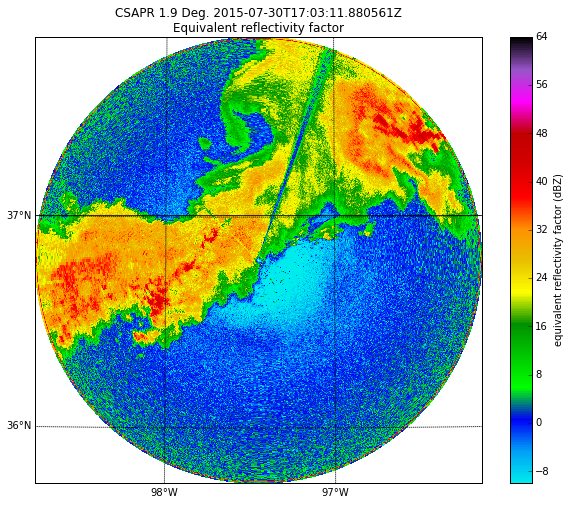

In [9]:
display = pyart.graph.RadarMapDisplay(radar)
fig = plt.figure(figsize = [10,8])
display.plot_ppi_map('reflectivity', sweep = 2, resolution = 'i',
                    vmin = -10, vmax = 64, mask_outside = False,
                    cmap = pyart.graph.cm.NWSRef)


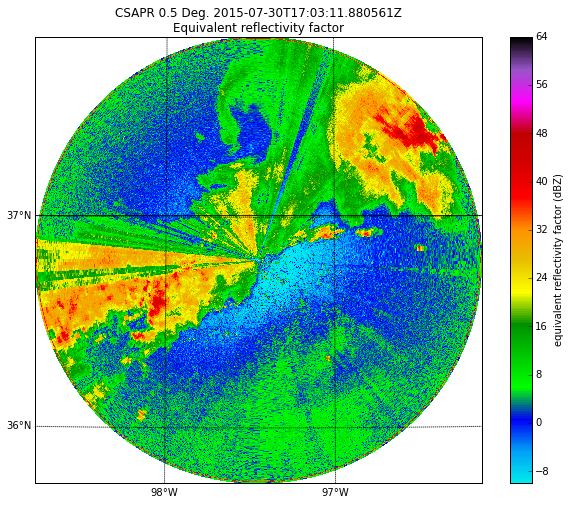

In [10]:
display = pyart.graph.RadarMapDisplay(radar)
fig = plt.figure(figsize = [10,8])
display.plot_ppi_map('clutter_filtered_reflectivity', sweep = 0, resolution = 'i',
                    vmin = -10, vmax = 64, mask_outside = False,
                    cmap = pyart.graph.cm.NWSRef)


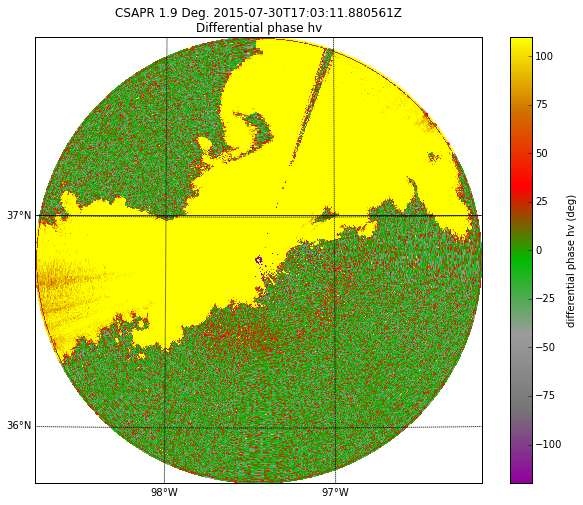

In [11]:
display = pyart.graph.RadarMapDisplay(radar)
fig = plt.figure(figsize = [10,8])
display.plot_ppi_map('differential_phase', sweep = 2, resolution = 'i',
                    vmin = -120, vmax = 110, mask_outside = False,
                    cmap = pyart.graph.cm.NWS_SPW)


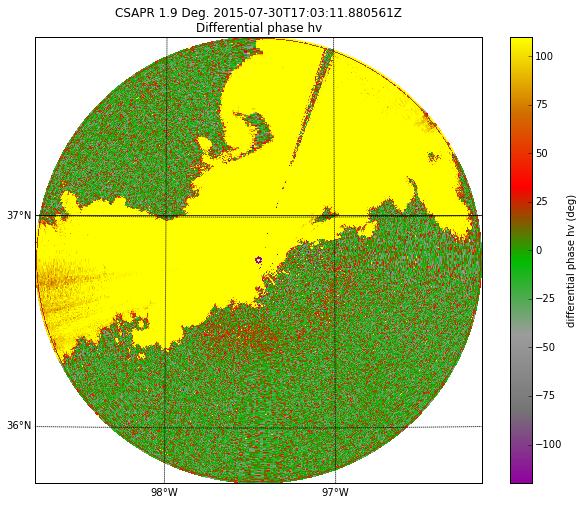

In [12]:
display = pyart.graph.RadarMapDisplay(radar)
fig = plt.figure(figsize = [10,8])
display.plot_ppi_map('clutter_filtered_differential_phase', sweep = 2, resolution = 'i',
                    vmin = -120, vmax = 110, mask_outside = False,
                    cmap = pyart.graph.cm.NWS_SPW)


In [13]:
phidp_text = pyart.retrieve.texture_of_complex_phase(radar)
radar.add_field('differential_phase_texture', phidp_text, replace_existing = True)

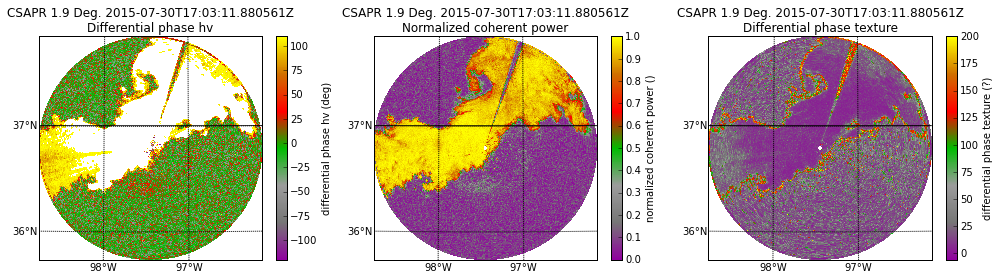

In [14]:
#create an instance of the class using our radar
display = pyart.graph.RadarMapDisplay(radar)
#create a Matplotlib figure
f = plt.figure(figsize = [17,4])
#now we are going to do a three panel plot, resolution is a basemap parameter and determines the resolution of 
#the coastline.. here we set to intermediate or 'i' ('h' for high 'l' for low)
plt.subplot(1, 3, 1) 
display.plot_ppi_map('differential_phase', sweep = 2, vmin =-120, vmax = 110, 
                     resolution = 'i', cmap = pyart.graph.cm.NWS_SPW)
plt.subplot(1, 3, 2) 
display.plot_ppi_map('normalized_coherent_power', sweep = 2, vmin = 0, vmax = 1,
                     resolution = 'i', cmap = pyart.graph.cm.NWS_SPW)
plt.subplot(1, 3, 3) 
display.plot_ppi_map('differential_phase_texture', sweep = 2, vmax = 200,
                     resolution = 'i', cmap = pyart.graph.cm.NWS_SPW)

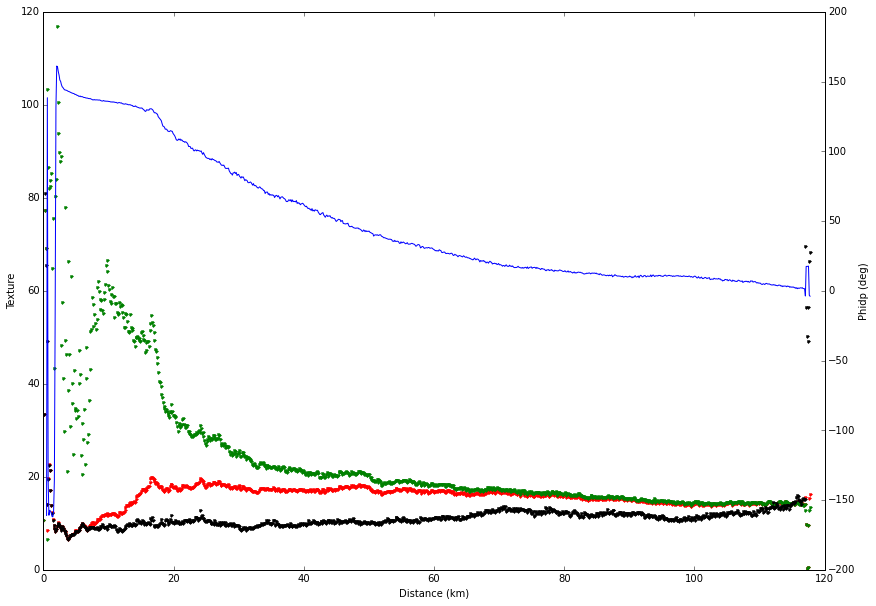

In [15]:
ncp_array = radar.fields['normalized_coherent_power']['data']
w_texture_complex = radar.fields['differential_phase_texture']['data']
w_texture_phidp_filt = np.ma.masked_where(ncp_array > .5, w_texture_complex )
w_texture_phidp_good = np.ma.masked_where(ncp_array < .5, w_texture_complex )

mean_text_range_filt = w_texture_phidp_filt.mean(axis=0)
mean_text_range = w_texture_complex.mean(axis=0)
mean_text_range_good = w_texture_phidp_good.mean(axis=0)
ranges = radar.range['data']/1000.0
fig = plt.figure(figsize = [14,10])
plt.plot(ranges, mean_text_range/2.0, 'r.')
plt.plot(ranges, mean_text_range_filt/2.0, 'g.')
plt.plot(ranges, mean_text_range_good/2.0, 'k.')
plt.xlabel('Distance (km)')
plt.ylabel('Texture')
plt.twinx()

good_phidp = np.ma.masked_where(w_texture_complex > 25, radar.fields['differential_phase']['data'])

plt.plot(ranges, good_phidp.mean(axis=0))
plt.ylabel('Phidp (deg)')

<matplotlib.colorbar.Colorbar instance at 0x10b00b680>

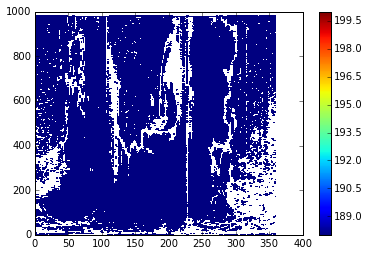

In [16]:
plt.pcolor(good_phidp[0:360, :].transpose(), vmin = 188, vmax = 200)
plt.colorbar()

In [17]:
#kwrgsss = {'sweep' : 3, 'min_lon' : min_lon, 'max_lon' : max_lon, 
#           'min_lat' : min_lat, 'max_lat' : max_lat, 'resolution' : 'l'}
kwrgsss = {'sweep' : 2, 'resolution' : 'l'}


def update_radar(n):
    global fig, ax1, sx2, ax3, ax4, cmap
    display = pyart.graph.RadarMapDisplay( pyart.io.read(ppis[n]))
    ax1.cla()
    display.plot_ppi_map('differential_reflectivity', 
                         vmin = -1, vmax = 5, colorbar_flag = False, ax = ax1, **kwrgsss)
    ax2.cla()
    display.plot_ppi_map('reflectivity',vmin = -8, vmax = 64,
                         colorbar_flag = False, ax = ax2,
                         cmap = pyart.graph.cm.NWSRef, **kwrgsss)
    ax3.cla()
    display.plot_ppi_map('differential_phase', vmin =-180, vmax = 180,
                         colorbar_flag = False, ax = ax3, **kwrgsss)
    ax4.cla()
    display.plot_ppi_map('copolar_correlation_coefficient', vmin = 0, vmax = 1,
                         colorbar_flag = False, ax = ax4,**kwrgsss)
    
    

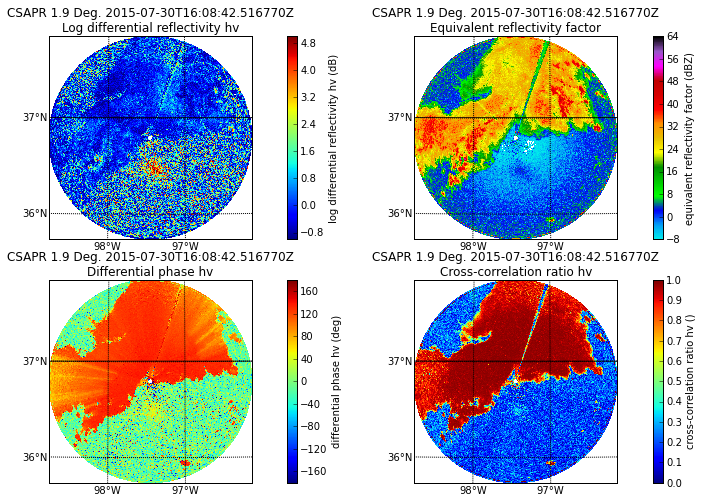

In [20]:
display = pyart.graph.RadarMapDisplay(pyart.io.read(ppis[0]))
fig = plt.figure(figsize = [12,8])
ax1 = plt.subplot(2, 2, 1) 
display.plot_ppi_map('differential_reflectivity', vmin = -1, vmax = 5, **kwrgsss)
cbax=plt.gca()
ax2 = plt.subplot(2, 2, 2); display.plot_ppi_map('reflectivity',vmin = -8, vmax = 64, cmap = pyart.graph.cm.NWSRef,
                                                 **kwrgsss)
ax3 = plt.subplot(2, 2, 3); display.plot_ppi_map('differential_phase', vmin =-180, vmax = 180, **kwrgsss)
ax4 = plt.subplot(2, 2, 4); display.plot_ppi_map('copolar_correlation_coefficient', vmin = 0, vmax = 1, **kwrgsss)
anim = FuncAnimation(fig, update_radar, interval=500, frames= len(ppis))


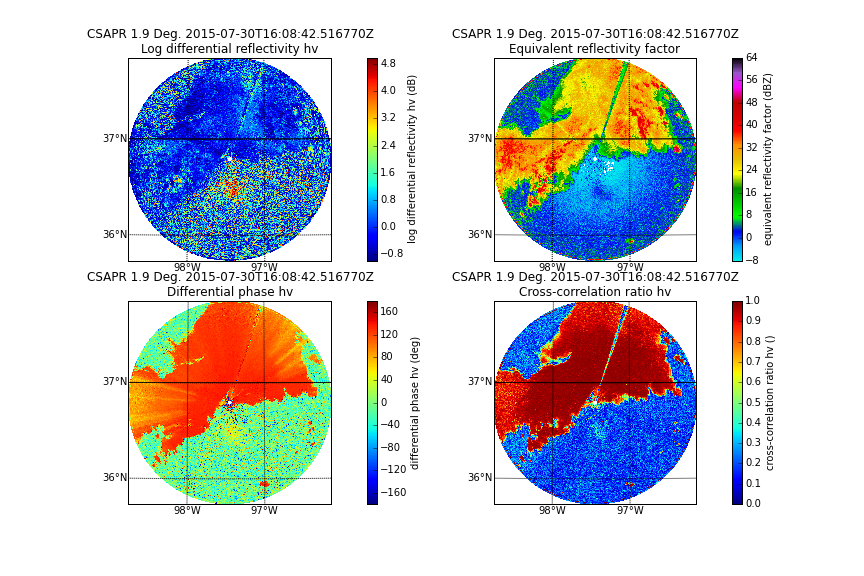
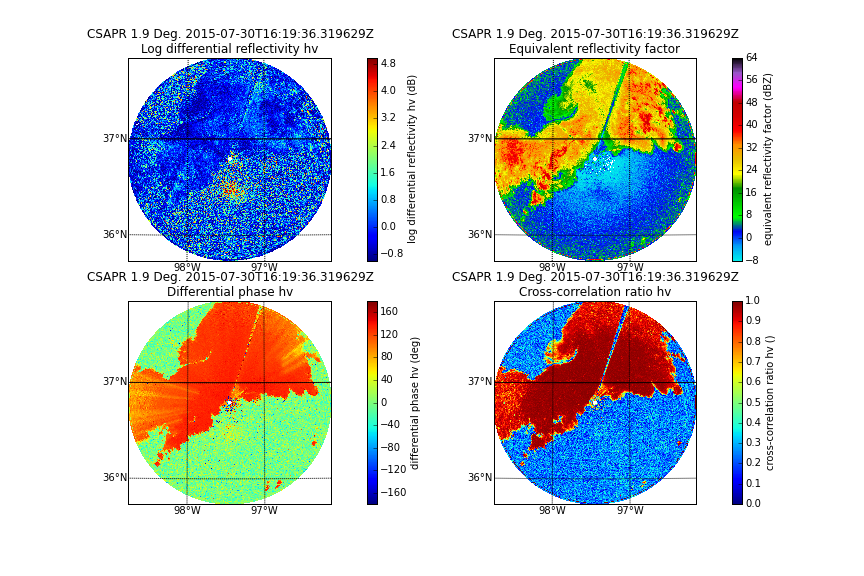
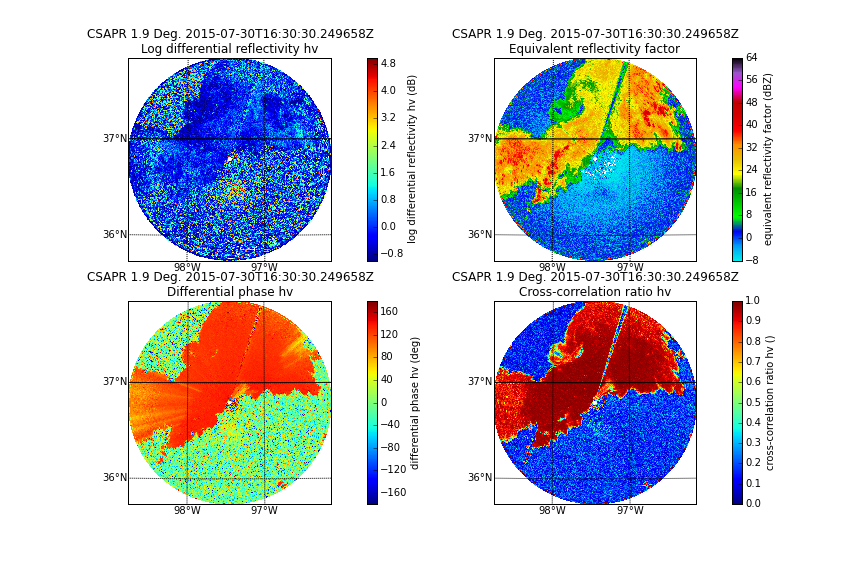
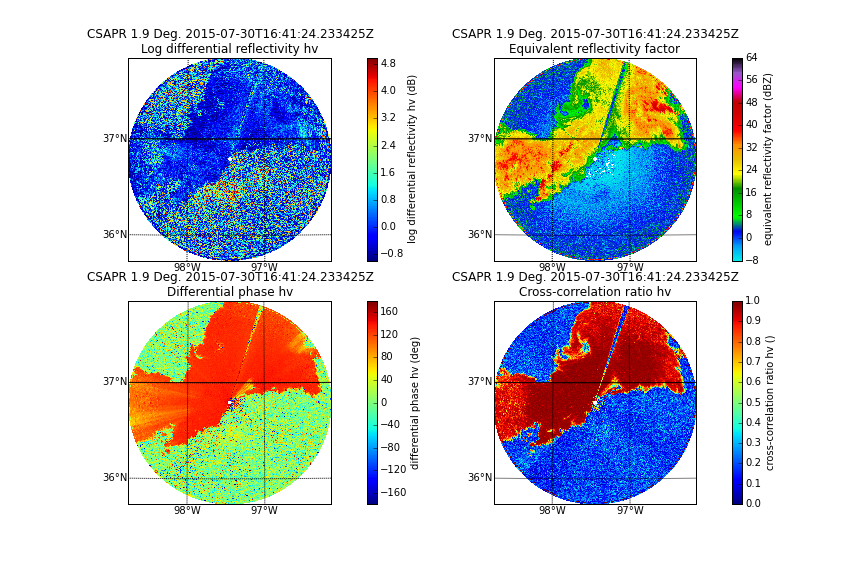
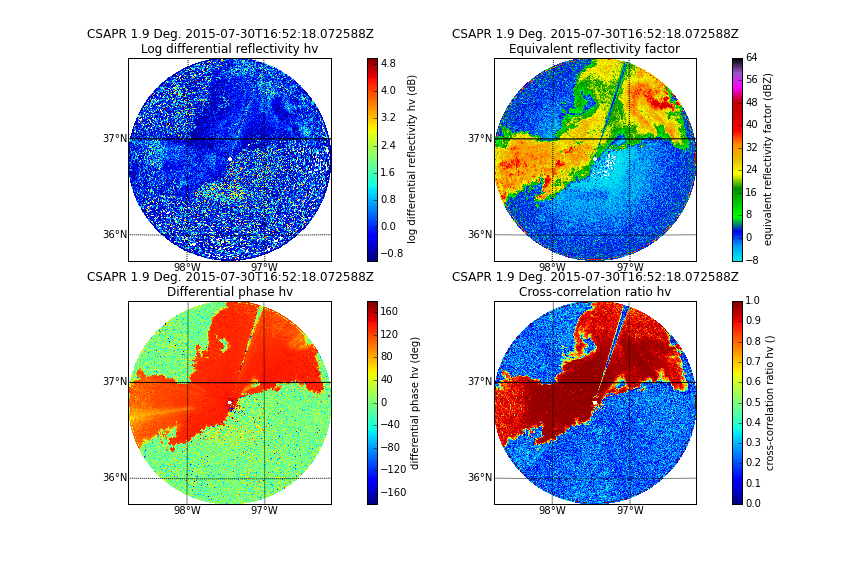
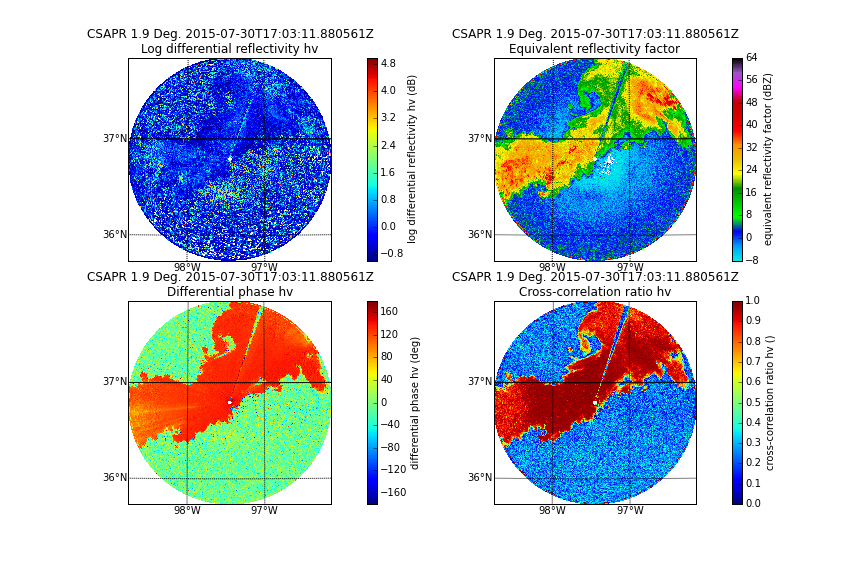

In [21]:
display_animation(anim, default_mode='once')

In [22]:
anim.save('./csapr.mp4', fps=5, extra_args=['-vcodec', 'libx264'])

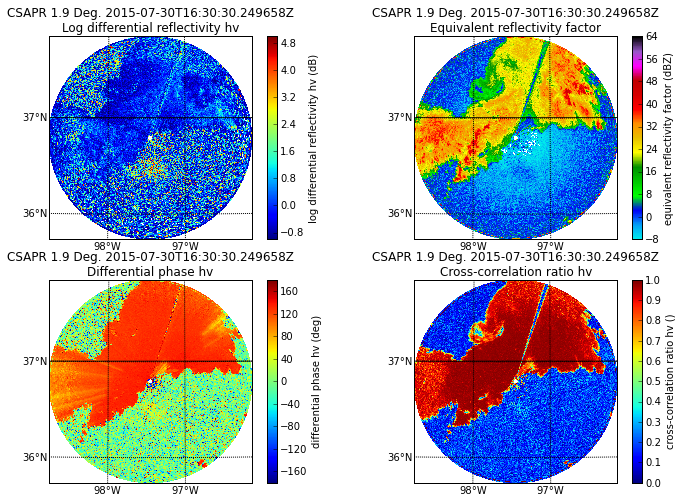

In [23]:
display = pyart.graph.RadarMapDisplay(pyart.io.read(ppis[2]))
fig = plt.figure(figsize = [12,8])
ax1 = plt.subplot(2, 2, 1) 
display.plot_ppi_map('differential_reflectivity', vmin = -1, vmax = 5, **kwrgsss)
cbax=plt.gca()
ax2 = plt.subplot(2, 2, 2); display.plot_ppi_map('reflectivity',vmin = -8, vmax = 64, cmap = pyart.graph.cm.NWSRef,
                                                 **kwrgsss)
ax3 = plt.subplot(2, 2, 3); display.plot_ppi_map('differential_phase', vmin =-180, vmax = 180, **kwrgsss)
ax4 = plt.subplot(2, 2, 4); display.plot_ppi_map('copolar_correlation_coefficient', vmin = 0, vmax = 1, **kwrgsss)